# TensorFlow 2.0

We know the equation of straight line: $ y = wx + b $

But if we have more than 1 feature: $ y = w_{1}x_{1} + w_{2}x_{2} + b $

In deep learning, we prefer smooth differentiable function(`sigmoid`)

$ \hat{y} = \sigma(a) = w_{1}x_{1} + w_{2}x_{2} + b $

sigmoid function is also called sometimes logistic function

> If we have > 2 imputs?

We take transpose of weight and take the dot product of this and inputs

$ \hat{y} = \sigma(w^Tx + b) $

The above equation is implemented in the keras layer
```
tf.keras.layers.Dense(output_size)
```

In [1]:
import numpy as np

In [3]:
w = np.random.randn(1, 3)
print("Original Array: \n", w)
wT = w.transpose() # same as np.transpose(w)
print("Transposed Array: \n", wT)

Original Array: 
 [[ 0.62456999 -0.41158909  0.31299238]]
Transposed Array: 
 [[ 0.62456999]
 [-0.41158909]
 [ 0.31299238]]


In [4]:
b = np.random.randn(1, 2)
ans = np.dot(wT, b)
ans

array([[-0.26164606, -0.1559211 ],
       [ 0.17242369,  0.10275137],
       [-0.13111937, -0.07813715]])

## Classification

### The main steps

```py
R, C = data.shape
```

```py
model = tf.keras.models.Sequential([
    tk.keras.layers.Input(shape=(C,)),
    tk.keras.layers.Dense(1, activation="sigmoid")
])
```

- in the `Sequential` model we pass a list of layers
- The first layer is a kind of dummy layer, because it'll automatically be passed whether we specify it or not.

```py
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
```

- the cost/loss function is `binary_crossentropy`.
- the general strategy in training/fitting is `gradient_descent`. There are many kinds of gradient_descent but `adam` is the default.

```py
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100)
```

```py
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
```

## Regression

We don't use any activation function in regression because target can be any real number.

```py
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
```

```py
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")
```

## The Neuron

- [Linear Regression for Regression](https://github.com/ikReza/ML-algorithms/blob/master/TensorFlow/breast_cancer.ipynb)
- [Logistic Regression for Classification]

Logistic Regression is referred as `neuron`

#### Feature importance

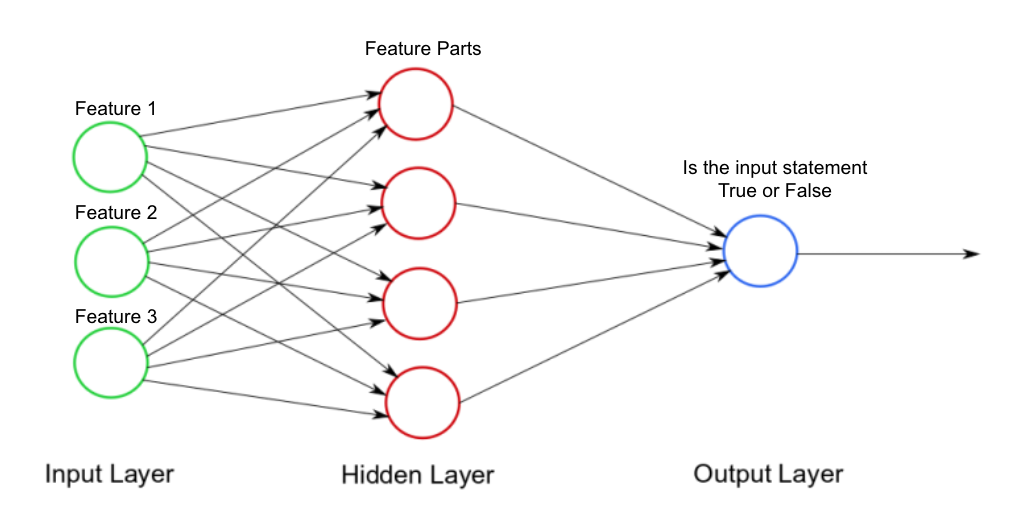

Which feature is important for predicting the output that can be known from the magnitude of `w`.
- if $ w = 0 $, then $ x $ has no effect
- if $ |w| $ is large, then $ x $ has large influence

How this is related to neurons?

Human neurons/nerves - eyes, noes, ears etc. If we go to market to buy a dress for our next program, how do we choose?
- features: color, size, price, quality of cloth
- wights: 

## Gradient Descent

Inside the keras `fit` function:

```py
w, b = #randomly initialized
for epoch in range(epochs):
    𝑤 = 𝑤 − 𝜇 ∗ ∇𝑤𝐽
    b = b − 𝜇 ∗ ∇b𝐽
```
$ w = w - \mu * \nabla_{w}J $    
$ b = b - \mu * \nabla_{b}J $

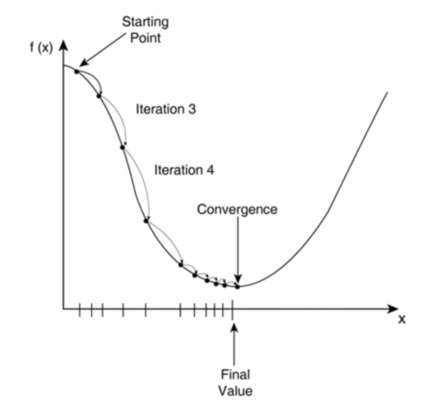

So, using gradient descent, the cost/loss decreases in each iteration/step.Now what should be the magnitude of these steps that we need to specify. This is called `learning rate`, the `mu` sign ( $ \mu $ ) in the above equations

Unfortunatelt, there is no direct method for chosing learning rate.

## Making Predictions

Linear Regression: $ \hat{y} = \sigma(w^Tx + b) $

Logistic Regression: $ p(y = 1|x) = \sigma(w^Tx + b) $